In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# confusion_matrix
from sklearn.metrics import confusion_matrix
# precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("./StressLevelDataset.csv")

In [3]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [12]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [5]:
data['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

Academic Factors: 學術因素：

In [6]:
data['academic_performance'].value_counts()

academic_performance
2    348
4    188
1    185
5    182
3    169
0     28
Name: count, dtype: int64

In [13]:
data['academic_performance'].describe()

count    1100.000000
mean        2.772727
std         1.414594
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: academic_performance, dtype: float64

5 -> 182<br>
4 -> 188<br>
3 -> 169<br>
2 -> 348<br>
1 -> 185<br>
0 ->  28

In [7]:
data['study_load'].value_counts()

study_load
2    333
3    275
1    185
4    142
5    128
0     37
Name: count, dtype: int64

5 -> 128<br>
4 -> 142<br>
3 -> 275<br>
2 -> 333<br>
1 -> 185<br>
0 ->  37

In [8]:
data['future_career_concerns'].value_counts()

future_career_concerns
1    327
2    199
5    186
4    185
3    173
0     30
Name: count, dtype: int64

5 -> 186<br>
4 -> 185<br>
3 -> 173<br>
2 -> 199<br>
1 -> 327<br>
0 ->  30

Social Factors: 社會因素：

In [9]:
data['social_support'].value_counts()

social_support
3    458
1    412
2    142
0     88
Name: count, dtype: int64

3 -> 458<br>
2 -> 142<br>
1 -> 412<br>
0 ->  88

In [10]:
data['extracurricular_activities'].value_counts()

extracurricular_activities
2    332
4    198
1    184
3    178
5    174
0     34
Name: count, dtype: int64

5 -> 174<br>
4 -> 198<br>
3 -> 178<br>
2 -> 332<br>
1 -> 184<br>
0 ->  34

In [11]:
data['bullying'].value_counts()

bullying
1    335
3    199
4    187
5    173
2    167
0     39
Name: count, dtype: int64

5    173
4    187
3    199
2    167
1    335
0     39

Comparative Analysis: 比較分析：

In [20]:
# print(data['anxiety_level'].value_counts())
print(data['academic_performance'].value_counts())

academic_performance
2    348
4    188
1    185
5    182
3    169
0     28
Name: count, dtype: int64


In [17]:
correlation = data['anxiety_level'].corr(data['academic_performance'])

print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: -0.6496011296145091


In [18]:
correlation = data['sleep_quality'].corr(data['depression'])

print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: -0.6931609071393333


mental_health_history
bullying

In [22]:
print(data['mental_health_history'].value_counts())

mental_health_history
0    558
1    542
Name: count, dtype: int64


In [21]:
correlation = data['mental_health_history'].corr(data['bullying'])

print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.6243657971517645


General Exploration: 一般探索：

In [23]:
# 計算每個因素下報告負面經驗的學生數量
negative_reports = data[data > 0].sum()

# 找出最多的因素
most_negative_factor = negative_reports.idxmax()

print(f"The factor with the most negative reports is: {most_negative_factor}")

The factor with the most negative reports is: self_esteem


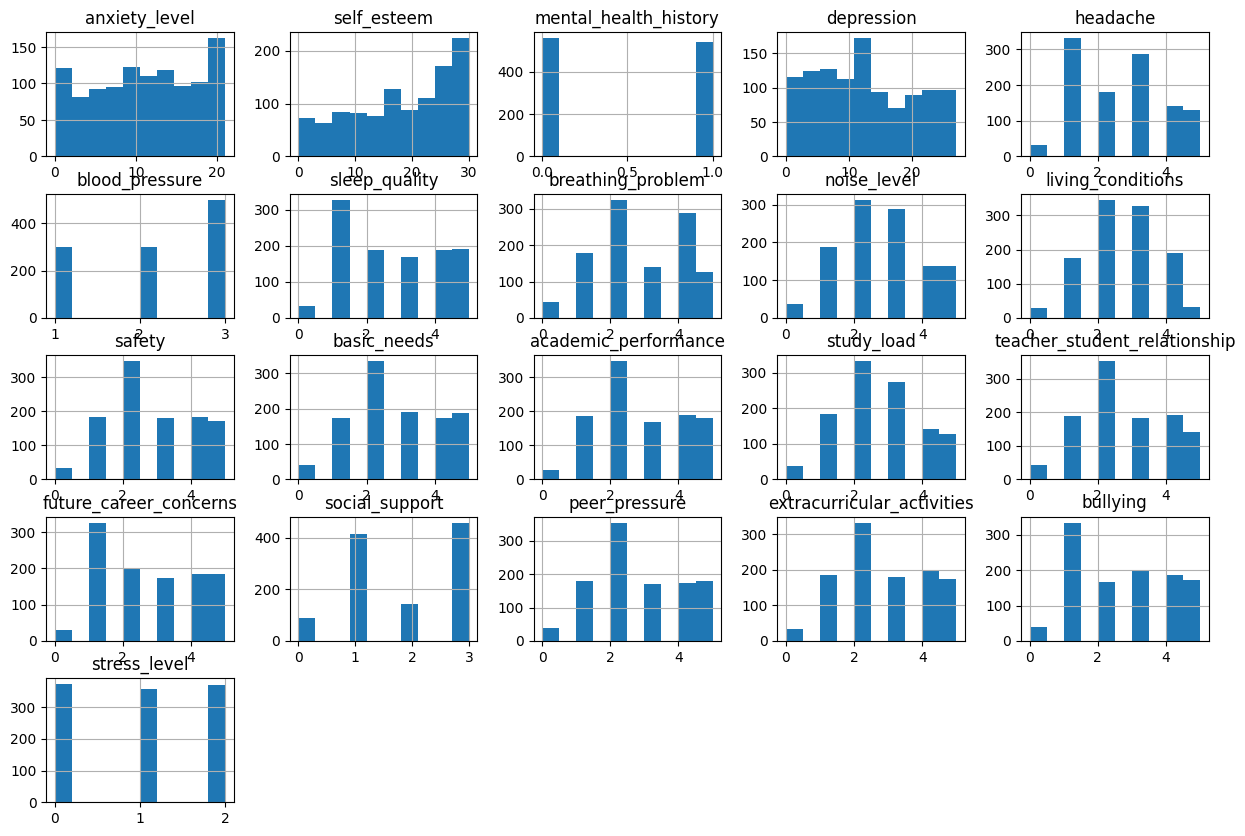

In [24]:
# 繪製不同因素的直方圖
data.hist(bins=10, figsize=(15, 10))
plt.show()

In [26]:
# 計算每個欄位與 'stress_level' 的相關係數
correlations = data.corr()['stress_level']

# 找出每個特徵對 'stress_level' 的相對影響程度
most_impactful_features = correlations.drop('stress_level').sort_values(ascending=False)

# 輸出相關性排序
print("Features ranked by correlation with stress_level:")
print(most_impactful_features)

Features ranked by correlation with stress_level:
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64
